In [1]:
from src.utils.helper_plot import get_minimal_distance_factors

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# constants
FOLDER_INTERIM = os.environ.get("DIR_DATA_INTERIM")
DATA_CRIME_CATEGORY = "df_category.csv"
FIG_SIZE = (30, 15)
TITLE_SIZE = 40

In [2]:
df_crime = pd.read_csv(filepath_or_buffer=FOLDER_INTERIM + "/" + DATA_CRIME_CATEGORY, 
                       parse_dates=['Outcome Date'])

# Explore Crime Categories
In this section, we explore further general crime rates by at Camden and its corresponding wards by looking at the following plots:
1. Boxplot - to understand the range of values for crime incidences, including the percentiles such as 25th, 50th and 75th percentiles.
1. Kernel density - to understand how our data is distributed across number of crime incidences.
1. Line plot - to understand how crime rates have evolved over time

***

## Crime in Camden
In this section, we focus on looking at crime rates in the higher-level Camden local authority.

### Understanding range of values
We see that the spread of our monthly crime rates for Camden vary quite differently across years. For 2015 and 2018, the range is quite narrow whereas for other years, the rates can jump between relatively high and low rates across each month.

Of most interest in 2019 where we have rates bunched up around 0.18% and 0.04% but no monthly rates in between. This year is also the year where the percentage point interquartile range is largest.

In [3]:
# aggregate data for plotting
df_camden = df_crime.groupby(by=["Date Year", "Date Month"]).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()
df_camden['Crime Rate'] = df_camden['Crime Incidences'] / df_camden['Population']

Text(0.5, 1.0, 'Boxplot: Camden crime rates')

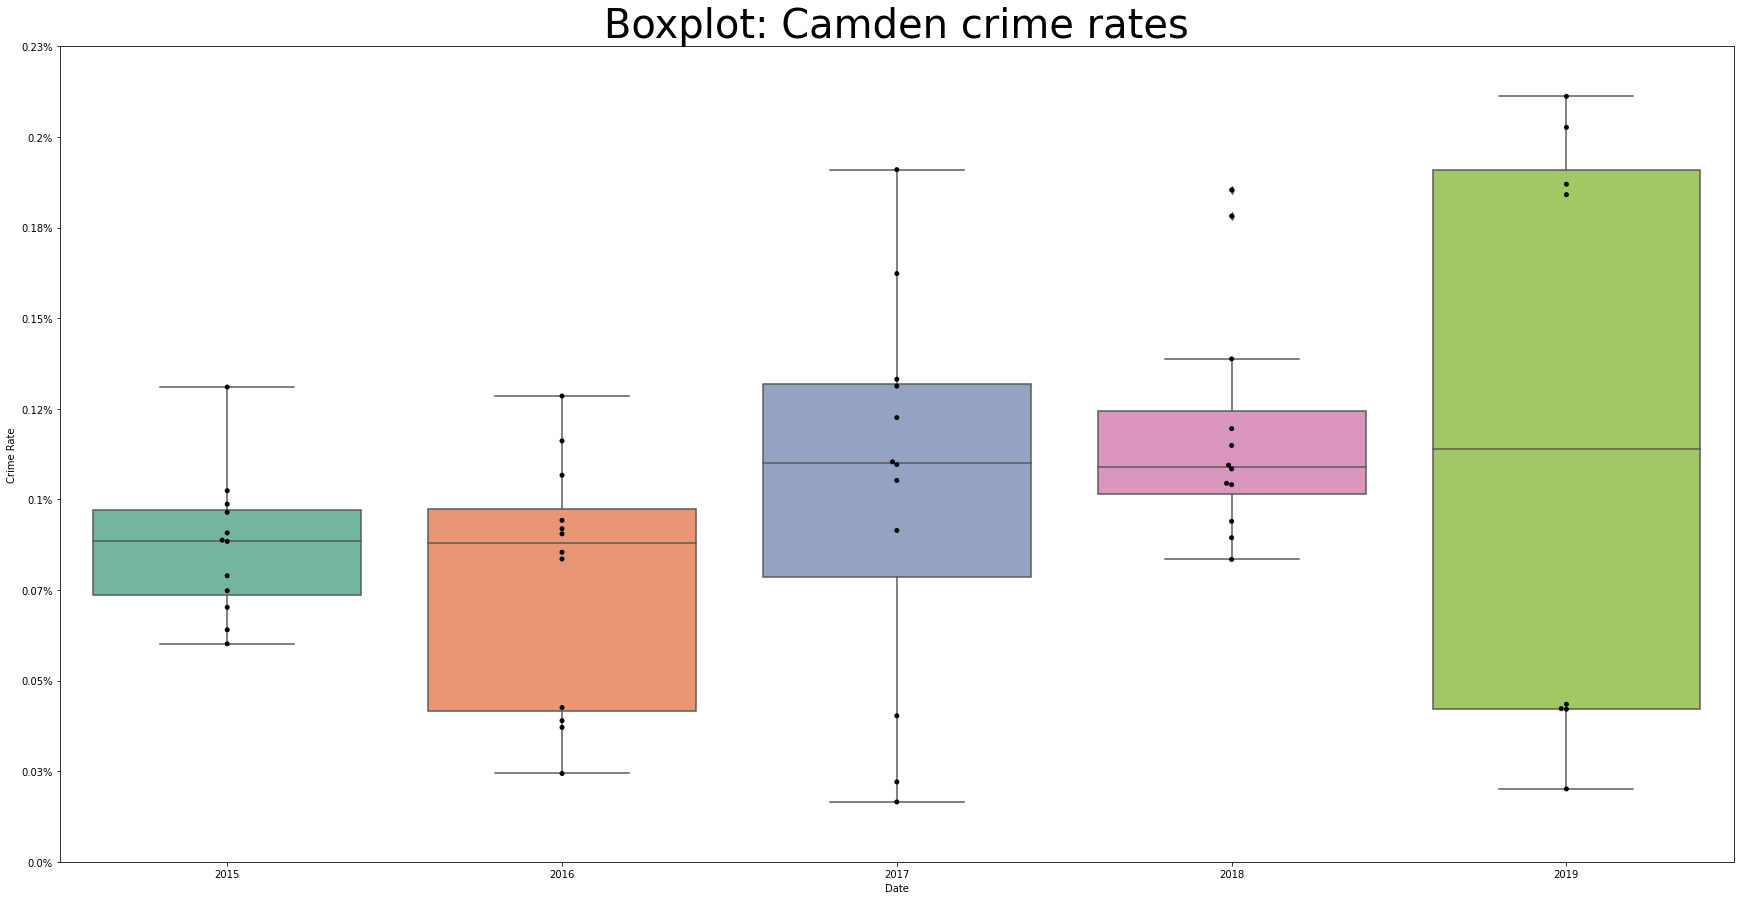

In [4]:
# set size of plot
fig, ax = plt.subplots(figsize=FIG_SIZE)

# plot
ax = sns.boxplot(x="Date Year", y="Crime Rate", data=df_camden, palette='Set2')
ax = sns.swarmplot(x="Date Year", y="Crime Rate", data=df_camden, color="black")

# adjust y-axis values to percentages for easier reading - https://stackoverflow.com/a/63755285/13416265
ticks_loc = ax.get_yticks().tolist()
ticks_loc = [round(number=x * 100, ndigits=2) for x in ticks_loc]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([f"{x}%" for x in ticks_loc])
ax.set_xlabel("Date")
ax.set_title(label="Boxplot: Camden crime rates", fontsize=TITLE_SIZE)

### Understanding distribution of data
We see in the density plots below complimentary information to the boxplots earlier, namely that for 2015, the spread of crime rates are concentrated around a small range, as suggested by the narrow and tall shape; whereas for 2019, we have the spread of crime rates to be large, as suggested by the wide and short shape, with there being two peaks around the interquartile range.

> *Considered violin plot to replace the boxplot and kernel density plot but hard to see the median values.*

Text(0.5, 1.0, 'Kernel Density: Camden crime rates')

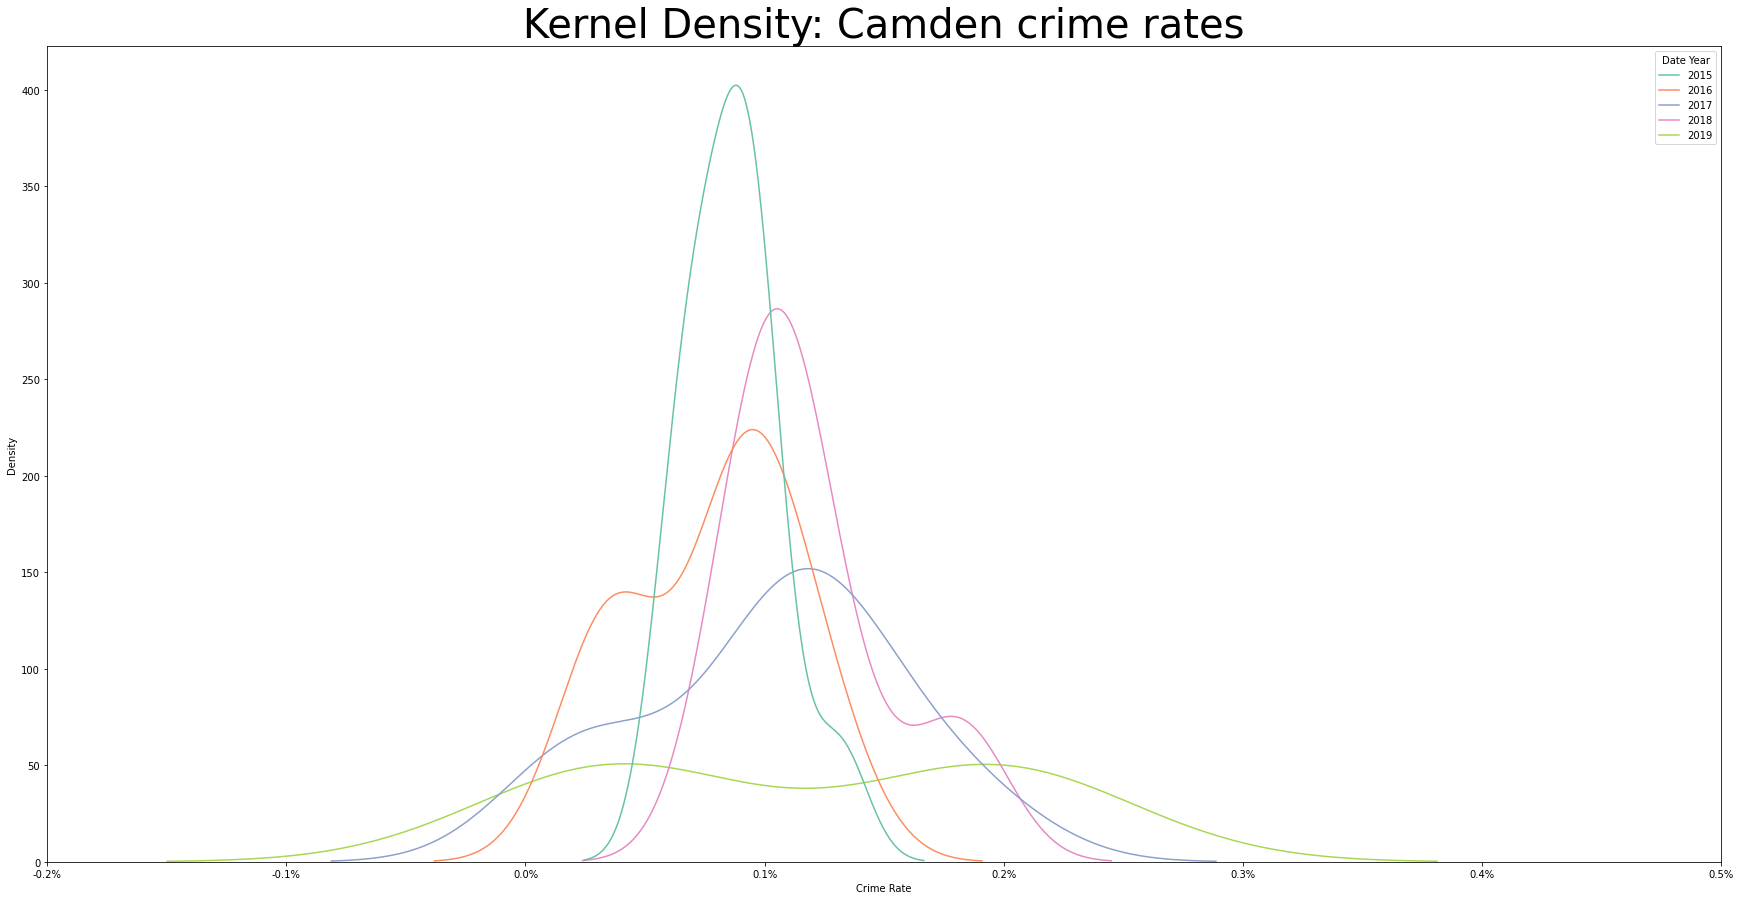

In [5]:
# set size of plot
fig, ax = plt.subplots(figsize=FIG_SIZE)

# plot
sns.kdeplot(data=df_camden, x="Crime Rate", hue="Date Year", palette='Set2')

# adjust x-axis values to percentages for easier reading - https://stackoverflow.com/a/63755285/13416265
ticks_loc = ax.get_xticks().tolist()
ticks_loc = [round(number=x * 100, ndigits=2) for x in ticks_loc]
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels([f"{x}%" for x in ticks_loc])
ax.set_title(label="Kernel Density: Camden crime rates", fontsize=TITLE_SIZE)

### Understanding evolution of crime rates over time
We see that generally, there is an upward trend in the crime rate from 2015 to 2019. However there is a lot of fluctuation and does not appear to be any recurring patterns between years so we are unlikely to see seasonal spikes or troughs in crime. There is an exception to this seasonal pattern though because we do spot in-year troughs of crime rates around Feb-Apr time.

In [6]:
# population looks strange, shouldn't change month-by-month
df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index().head(n=10)

,Outcome Date,Crime Incidences,Population
0,2015-01-01,1674,2614486.29
1,2015-02-01,2108,2817782.22
2,2015-03-01,2542,2864085.15
3,2015-04-01,2678,2950149.10
4,2015-05-01,3077,3005174.87
5,2015-06-01,3969,3029661.54
6,2015-07-01,1665,2768248.94
7,2015-08-01,1929,2747682.26
8,2015-09-01,2267,2872571.39
9,2015-10-01,2671,3020997.94


In [7]:
# aggregate data for plotting
df_camden = df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()
df_camden['Crime Rate'] = df_camden['Crime Incidences'] / df_camden['Population']
df_camden['Crime Incidences Log'] = np.log10(df_camden['Crime Incidences'])

Text(0.5, 1.0, 'Line plot: Camden crime rate over time')

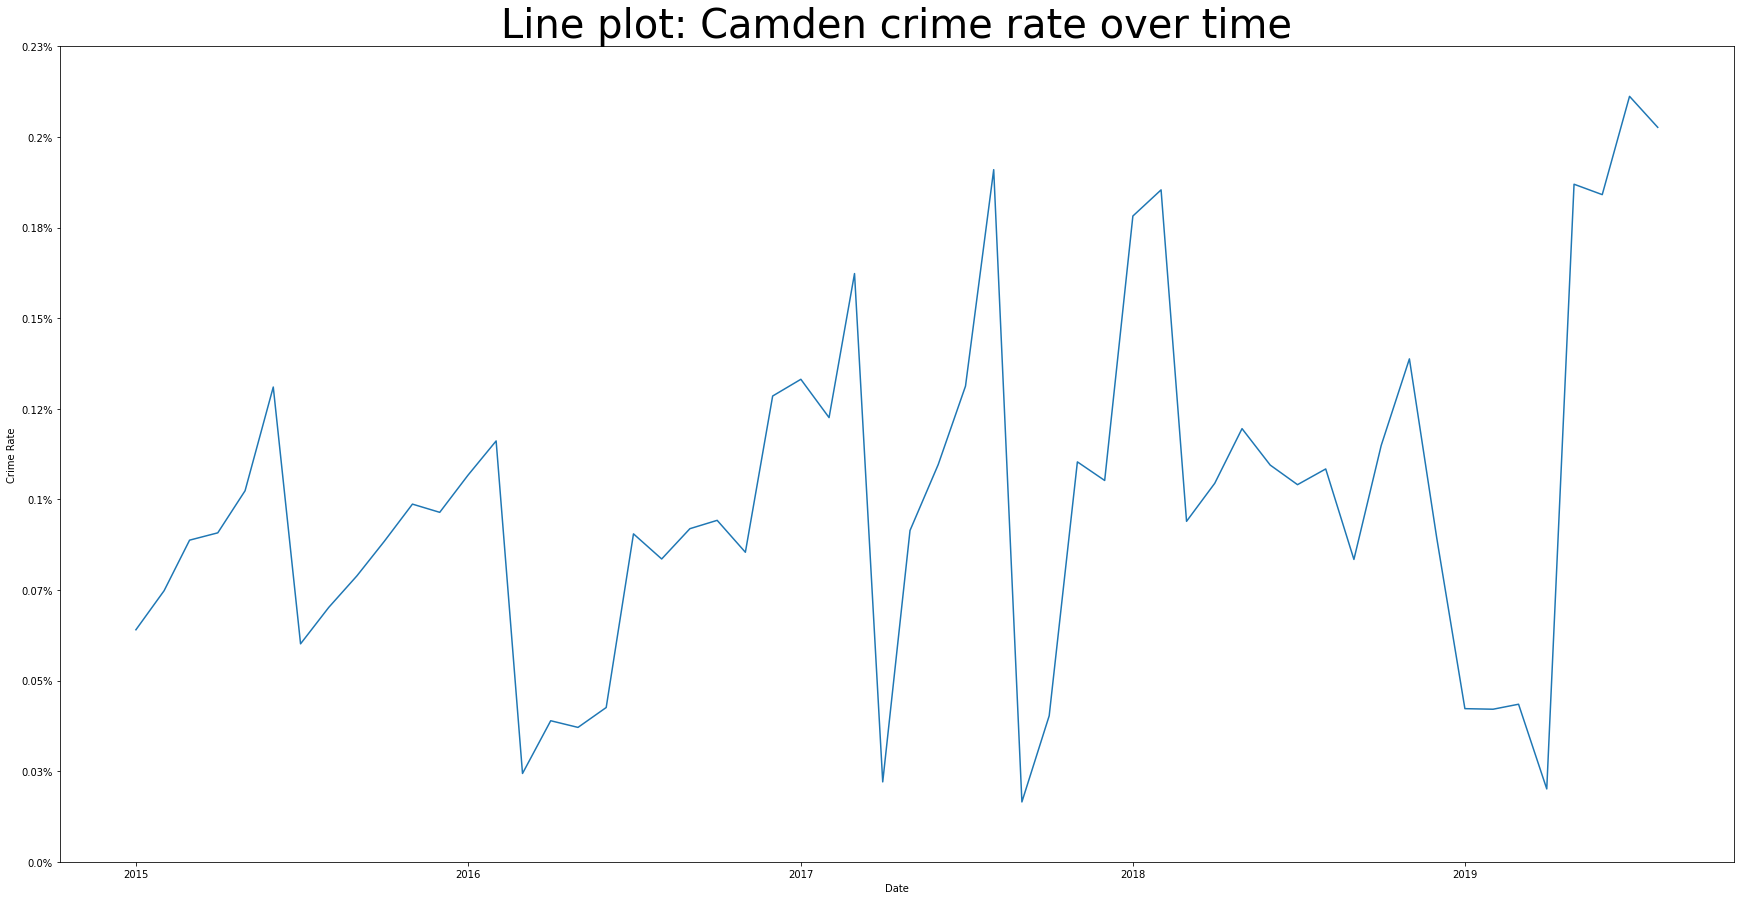

In [8]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

sns.lineplot(data=df_camden, x="Outcome Date", y="Crime Rate", palette='Set2')

# adjust y-axis values to percentages for easier reading - https://stackoverflow.com/a/63755285/13416265
ticks_loc = ax.get_yticks().tolist()
ticks_loc = [round(number=x * 100, ndigits=2) for x in ticks_loc]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([f"{x}%" for x in ticks_loc])
ax.set_ylabel("Crime Rate")
ax.set_xlabel("Date")
ax.set_title(label="Line plot: Camden crime rate over time", fontsize=TITLE_SIZE)

***

## Crime in Camden Wards
In this section, we focus on looking at crime rates in the lower-level Camden wards.

### Understanding range of values
Similar to what was seen at the Local Authority-level of Camden, across all wards, the range of values for our crime rate is smallest during 2015 and largest for 2019, with years between this having different ranges.

In [9]:
df_wards = df_crime.groupby(by=["Date Year", "Date Month", "Ward Name"]).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()
df_wards['Crime Rate'] = df_wards['Crime Incidences'] / df_wards['Population']

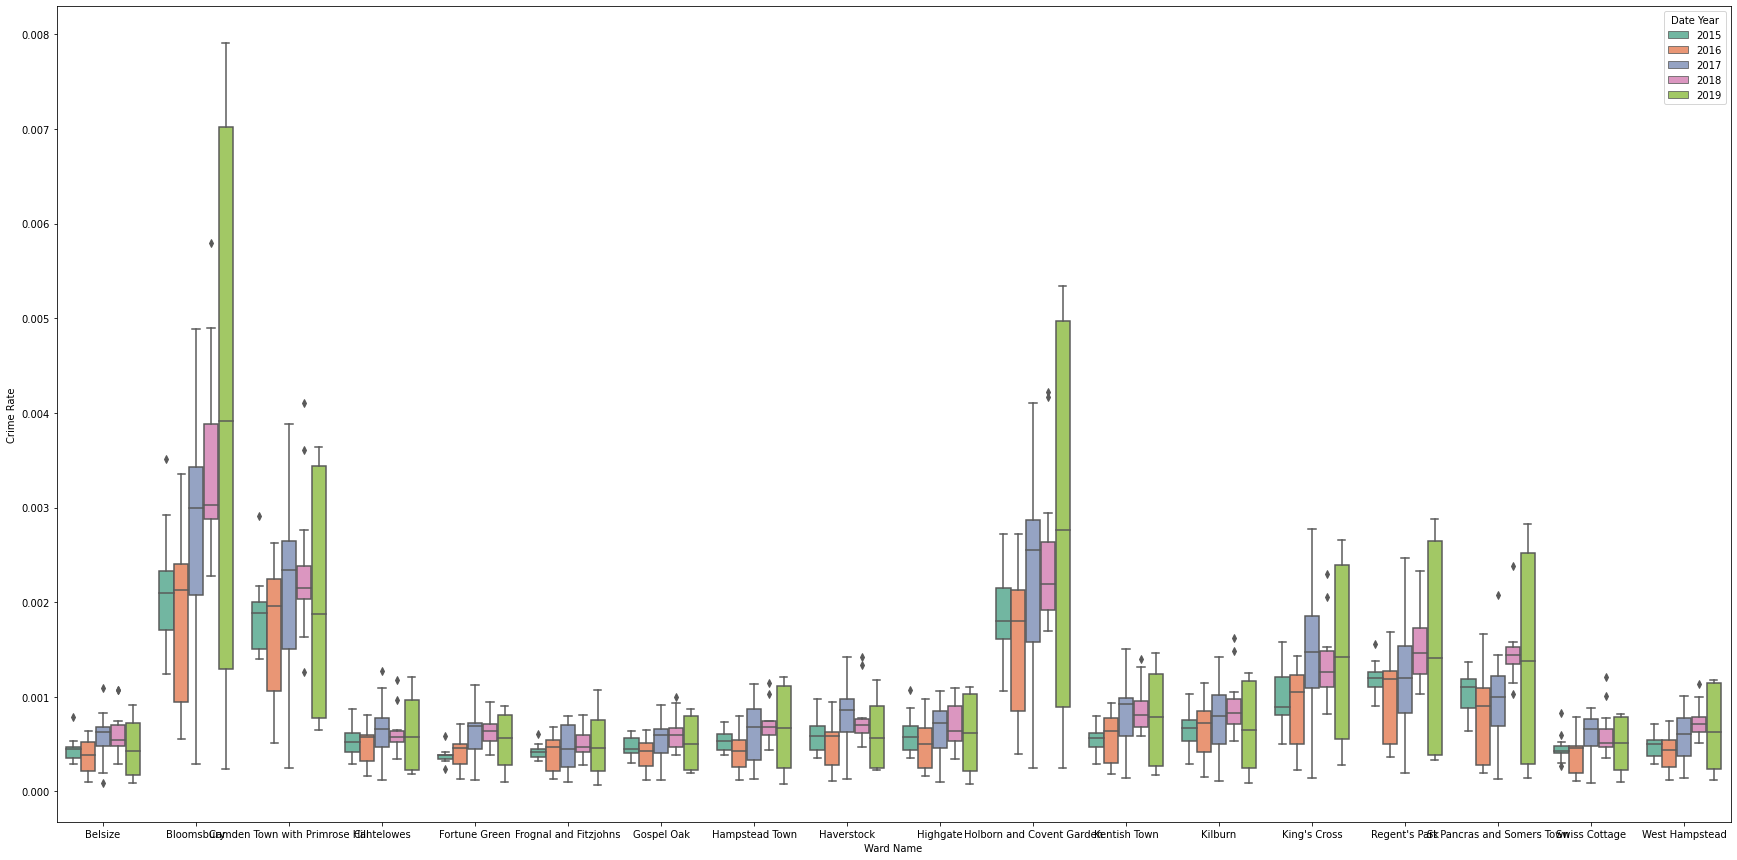

In [10]:
fig, ax = plt.subplots(figsize=(30, 15)) 
ax = sns.boxplot(ax=ax, x="Ward Name", y="Crime Rate", data=df_wards, palette='Set2', hue="Date Year", dodge=True)

### Understanding distribution of data
Similar to what was seen at the Local Authority-level of Camden, across all wards, we see below complimentary information to the boxplots earlier, namely that for 2015, the spread of crime rates are concentrated around a small range, as suggested by the narrow and tall shape; whereas for 2019, we have the spread of crime rates to be large, as suggested by the wide and short shape, with there being two peaks around the interquartile range.

The only exceptions to these cases are the wards of Fortune Green and Frognal & Fitzjohns where we do not posesses any 2015 data.

/Users/avisionho/Documents/GitHub/camdencasualties/venv_cc/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/avisionho/Documents/GitHub/camdencasualties/venv_cc/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


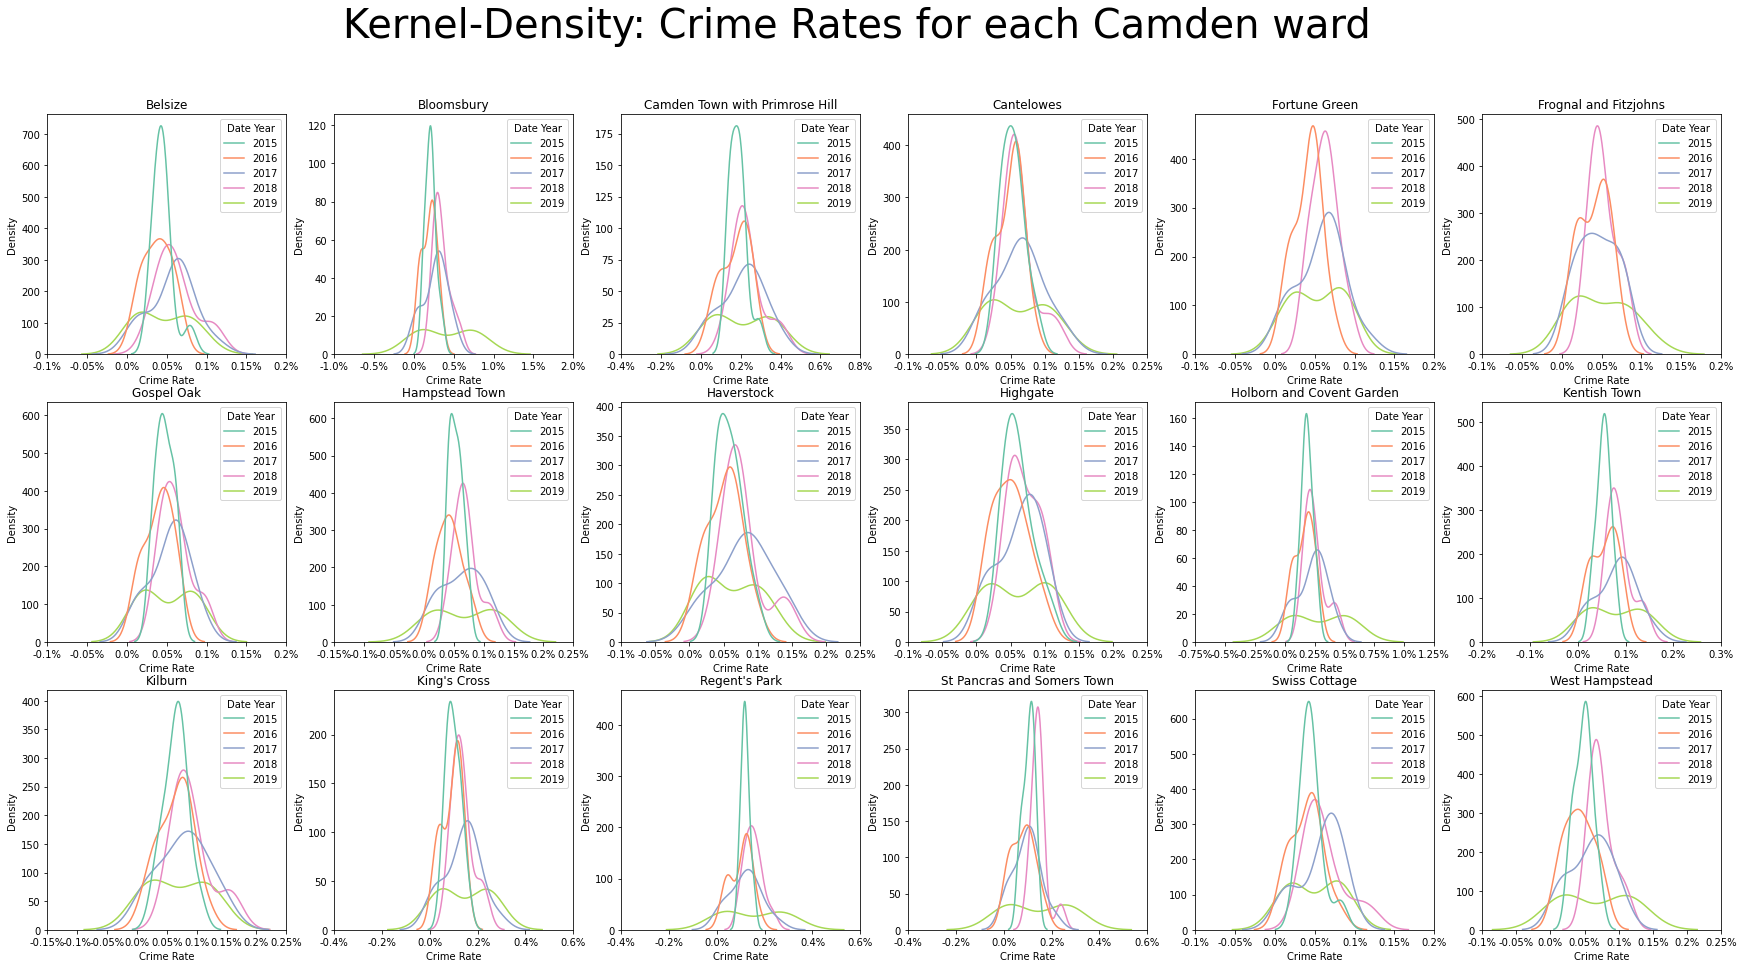

In [11]:
# set size of plot
wards = df_wards["Ward Name"].unique()
rows, cols = get_minimal_distance_factors(n=len(wards))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=FIG_SIZE)

# plot
plt.suptitle(t="Kernel-Density: Crime Rates for each Camden ward", fontsize=TITLE_SIZE)
for ax, ward in zip(axes.flatten(), wards):
    df = df_wards[df_wards["Ward Name"] == ward]
    sns.kdeplot(ax=ax, data=df, x="Crime Rate", hue="Date Year", palette='Set2')
    ax.set_title(label=f"{ward}")

    # adjust x-axis values to percentages for easier reading - https://stackoverflow.com/a/63755285/13416265
    ticks_loc = ax.get_xticks().tolist()
    ticks_loc = [round(number=x * 100, ndigits=2) for x in ticks_loc]
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels([f"{x}%" for x in ticks_loc])

### Understanding evolution of crime rates over time
Similar to what was seen at the Local Authority-level of Camden, across all wards, we see that crime rates have an upward trend. There is not much of a strong seasonal pattern also.

[[*StackOverflow - gboffi, 2018*](https://stackoverflow.com/a/53681489/13416265)]

In [12]:
df_wards = df_crime.groupby(by=['Outcome Date', 'Ward Name', 'Population']).agg(func={'Crime Incidences': 'sum'}).reset_index()
df_wards['Crime Rate'] = df_wards['Crime Incidences'] / df_wards['Population']

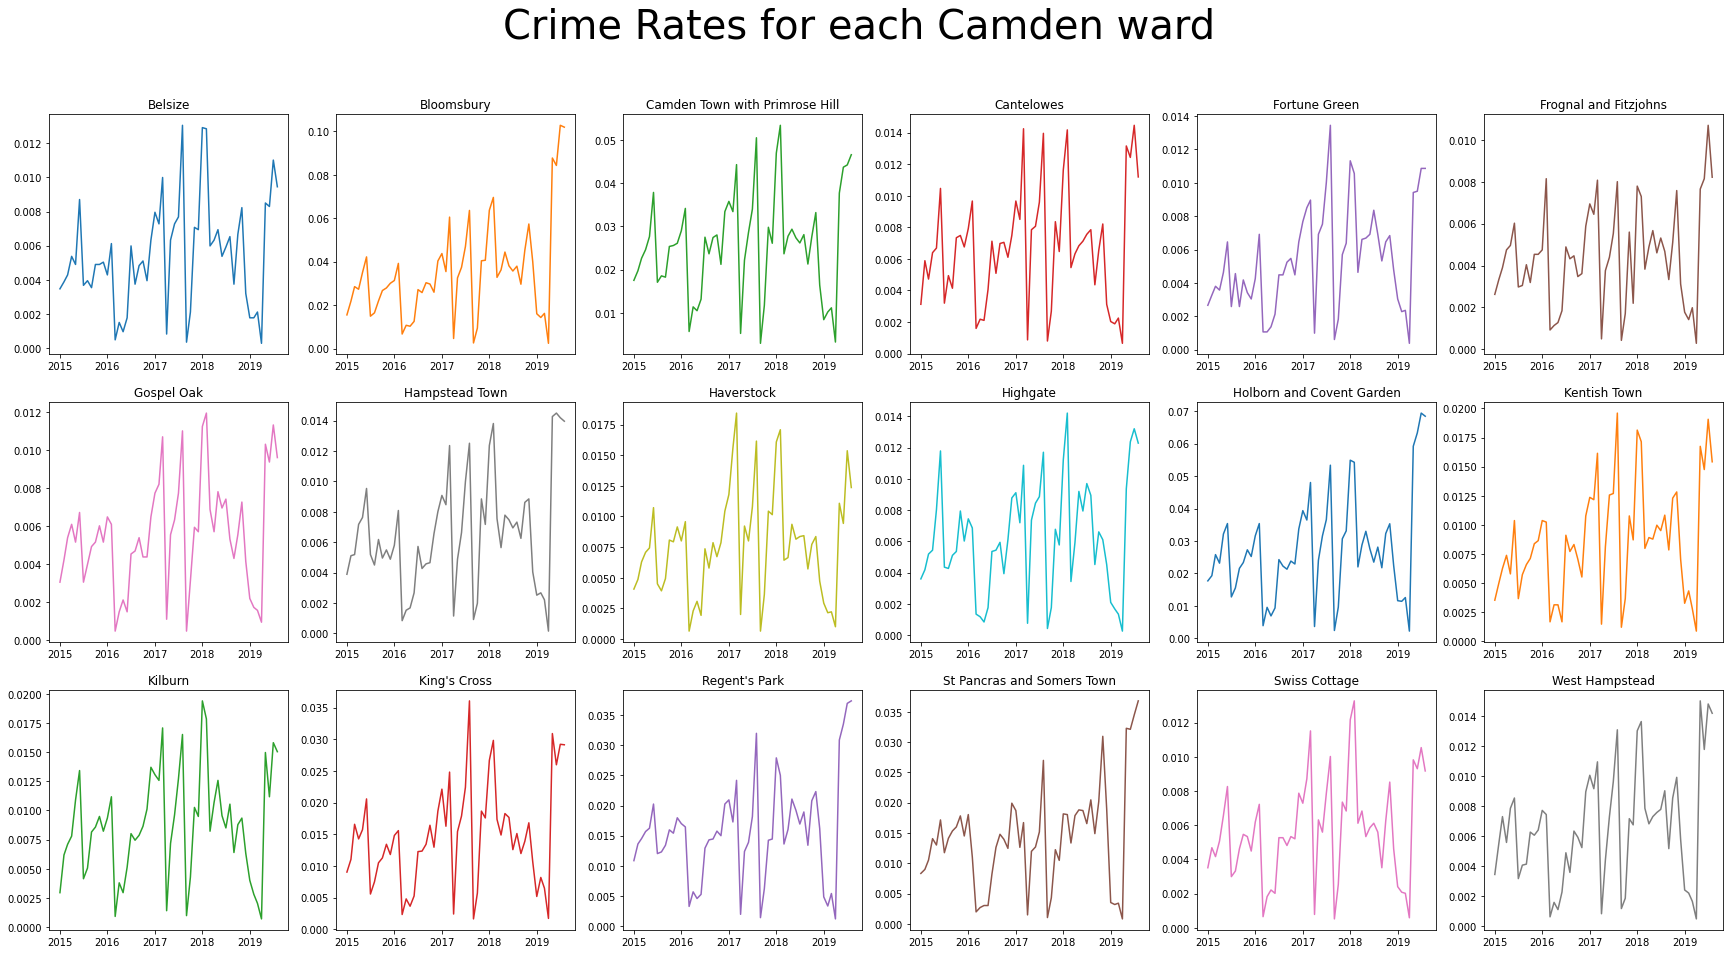

In [13]:
wards = df_wards["Ward Name"].unique()
colours = plt.rcParams['axes.prop_cycle']()

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
plt.suptitle(t="Crime Rates for each Camden ward", fontsize=40)
for ax, ward in zip(axes.flatten(), wards):
    df = df_wards[df_wards["Ward Name"] == ward]
    ax.plot("Outcome Date", "Crime Rate", data=df, **next(colours))
    ax.set_title(label=f"{ward}")